<a href="https://colab.research.google.com/github/drvoss/Colab-Notebooks/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100

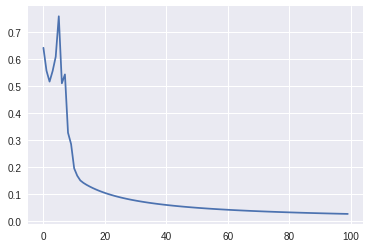

In [29]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris

iris = load_iris()
# iris는 (0,1,2)의 세 가지 종류를 분류하는 문제이므로
# (0,1)의 두 개 데이터만 사용한다
# 원래는 학습용과 테스트용으로 나누어야 하지만 여기선 생략한다
X = iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# iris 데이터는 4차원
net = nn.Linear(4, 1)
# 시그모이드 함수를 적용해서 두 클래스의 분류를 위한
# 크로스 엔트로피를 계산
loss_fn = nn.BCEWithLogitsLoss()
# SGD(약간 큰 학습률)
optimizer = optim.SGD(net.parameters(), lr=0.25)

# 손실 함수 로그
losses = []
# 100회 반복
for epoc in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  optimizer.zero_grad()
  # 선형 모델으로 y 예측값을 계산
  y_pred = net(X)
  # MSE loss를 사용한 미분 계산
  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()
  # 경사를 갱신한다
  optimizer.step()
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

# 선형 결합의 결과
h = net(X)
# 시그모이드 함수를 적용한 결과는 y=1의 확률을 보여 준다
#prob = nn.functional.sigmoid(h)
prob = torch.sigmoid(h)
# 확률이 0.5이상인 것을 클래스1로 예측하고 그외는 0으로 한다
# PyTorch에는 Bool형이 없으므로 ByteTensor가 출력된다.
y_pred = prob > 0.5
# 예측 결과 확인 (yはFloatTensor이므로 ByteTensor로
# 로 변환한 후에 비교）
(y.byte() == y_pred.view_as(y)).sum().item()